# Clustering Using Scikit Learn

Part 1

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/Users/subratotapaswi/Documents/ML/clustering-using-scikit-learn-Pronnati-202518052/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
#new dataframe containing Annual Income and Spending Score
X = df[['Annual Income (k$)','Spending Score (1-100)']].copy()

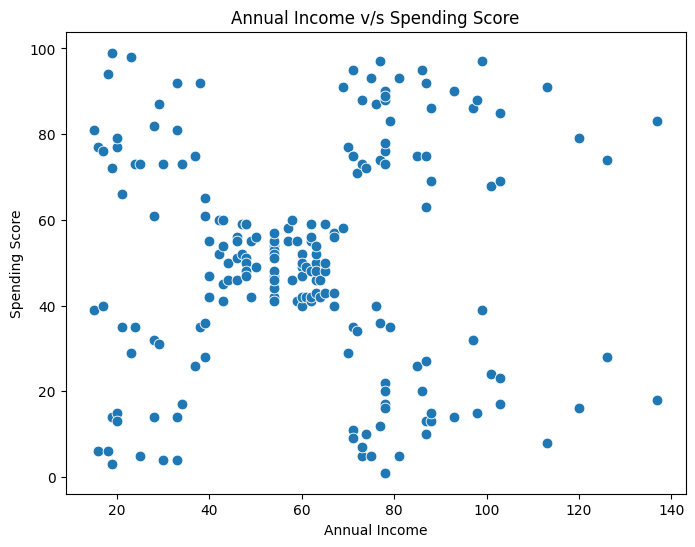

In [22]:
#visualization using scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=X, s=60)
plt.title('Annual Income v/s Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [23]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Part 2

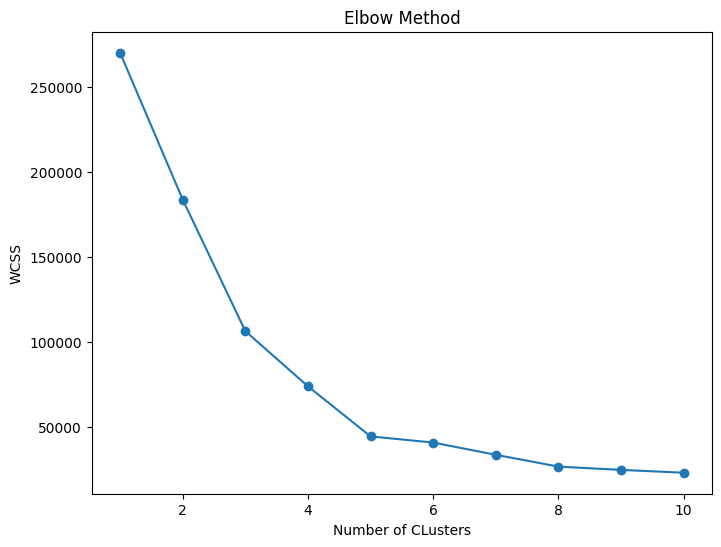

In [24]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

print('Custer Labels for First 10 Customers : ')
print(y_kmeans[:10])

Custer Labels for First 10 Customers : 
[4 2 4 2 4 2 4 2 4 2]


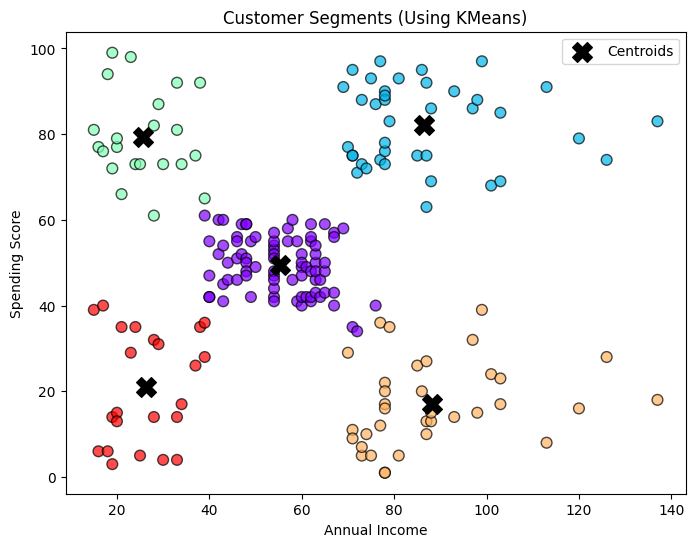

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=y_kmeans, cmap='rainbow', s=60, alpha=0.7, edgecolors='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X',
            label='Centroids')
plt.title('Customer Segments (Using KMeans)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Part 3

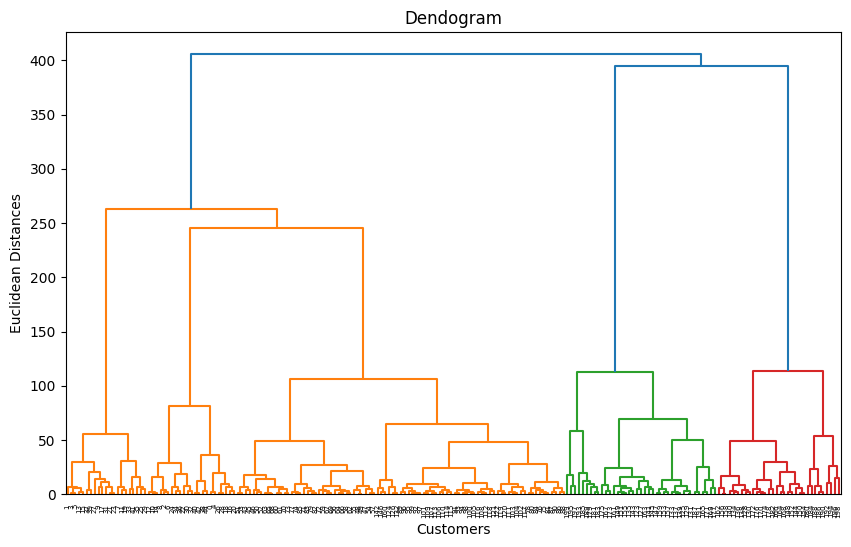

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X, method = 'ward')
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [28]:
optimal_clusters_hc = 5
hc_model = AgglomerativeClustering(n_clusters=optimal_clusters_hc,
                                   linkage='ward')
hc_labels = hc_model.fit_predict(X[['Annual Income (k$)','Spending Score (1-100)']])
X['HC_Cluster'] = hc_labels

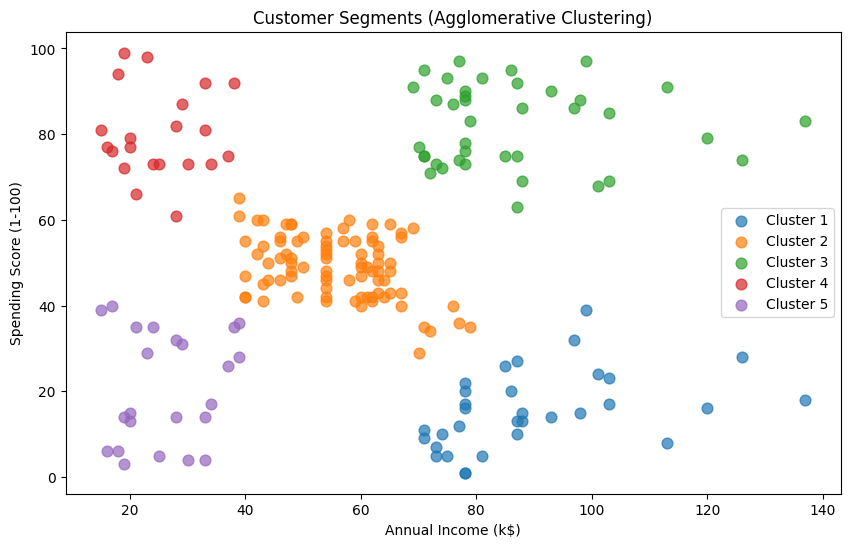

In [29]:
plt.figure(figsize=(10,6))
colors = plt.cm.tab10.colors  

for i in range(optimal_clusters_hc):
    data = X[X['HC_Cluster']==i]
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
                s=60, c=[colors[i % len(colors)]], label=f'Cluster {i+1}', alpha=0.7)

plt.title('Customer Segments (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Part 4

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X[['Annual Income (k$)', 'Spending Score (1-100)']])
X_scaled = pd.DataFrame(X_scaled_array, columns=['Annual Income (k$)','Spending Score (1-100)'])

In [41]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled[['Annual Income (k$)','Spending Score (1-100)']])

X_scaled['DBSCAN_Clusters'] = dbscan_labels

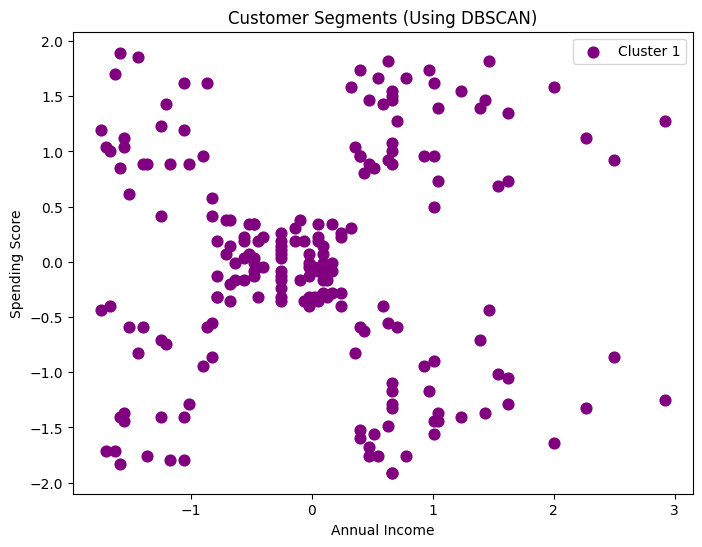

In [42]:
plt.figure(figsize=(8,6))
unique_labels = set(dbscan_labels)
colors = ['purple', 'red', 'green','cyan', 'magenta', 'yellow', 'blue']

for label in unique_labels:
    if label == -1:
        color = 'black'
        label_name = 'Noise'
    else:
        color = colors[label%len(colors)]
        label_name = f'Cluster {label+1}'

    plt.scatter(
        X_scaled[dbscan_labels == label]['Annual Income (k$)'],
        X_scaled[dbscan_labels == label]['Spending Score (1-100)'],
        s=60,
        c=color,
        label = label_name
    )
plt.title('Customer Segments (Using DBSCAN)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [43]:
dbscan_model = DBSCAN(eps = 0.45, min_samples = 9)
dbscan_labels = dbscan_model.fit_predict(X_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

X_scaled['DBSCAN_Clusters'] = dbscan_labels

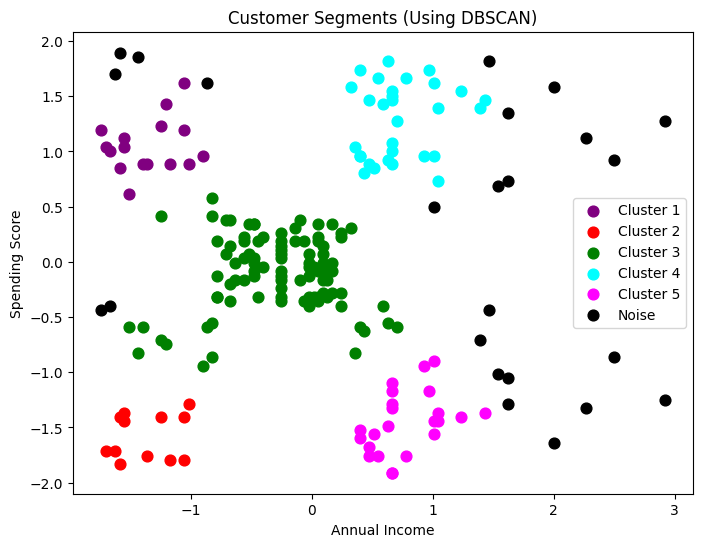

In [44]:
plt.figure(figsize=(8,6))
unique_labels = set(dbscan_labels)
colors = ['purple', 'red', 'green','cyan', 'magenta', 'yellow', 'blue']

for label in unique_labels:
    if label == -1:
        color = 'black'
        label_name = 'Noise'
    else:
        color = colors[label%len(colors)]
        label_name = f'Cluster {label+1}'

    plt.scatter(
        X_scaled[dbscan_labels == label]['Annual Income (k$)'],
        X_scaled[dbscan_labels == label]['Spending Score (1-100)'],
        s=60,
        c=color,
        label = label_name
    )
plt.title('Customer Segments (Using DBSCAN)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()